# AIN313 - Machine Learning Lab.
**Assignment 1**

**Diesase Detection on X-Ray Images**

**Instructor: **Erkut Erdem

**TA:** Sibel Kapan


# Student Information

Please fill the informations!

Name Surname: Emre Çoban

Student ID: 2200765028

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt       ## necessary libraries
import seaborn as sns
import cv2
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
import imageio as iio
import sklearn

## PART 1 Theory Questions  (  (Q) => Questions , (A) => Answers)

### k-Nearest Neighbor Classification

1-) (Q)Assume that you have a large training dataset. Specify a disadvantage of the k-Nearest
Neighbor method when using it during testing. State also your reason about your
answer.

-(A)If we had a large training dataset, training time would be short since we are just memorizing them, but the testing part will take long time since we have to compare each test row with all of those train dataset rows.

2-)Draw the 1-NN decision boundaries on the graph above.

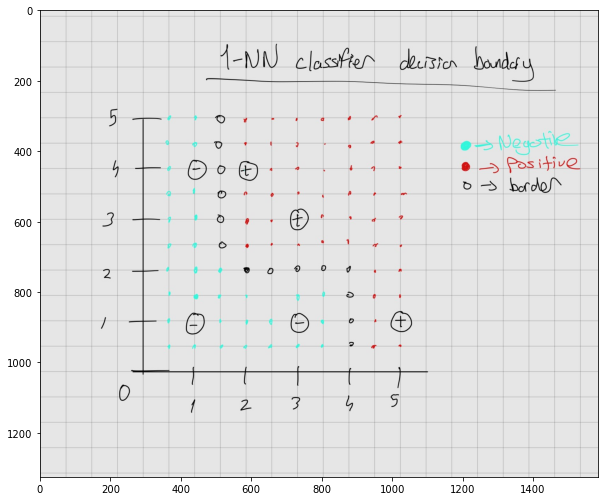

In [4]:
img = iio.imread("./decision_boundary.jpg")
plt.figure(figsize=(10,12))
plt.imshow(img)

2-)

(Q)How would 1-NN classify the unknown point (2, 3).

-(A) point (2,3)'s nearest first neighbor is positive point so it would be classified as positive.



(Q)What is the minimum value of k for the unknown value be negative?

-(A) If k was 5 the point would be classified as negative since there would be 3 negative 2 positive nearest neighbors.



(Q)Explain the effects of the smaller and larger value of k?

-(A) If k gets smaller this means we are gonna look for closer points but this could led to bad results since there might be outliers, if k gets bigger we need to look for more distant points and this could go bad too because we are taking more distant points into account. The ideal number of K can be found by using elbow method.


### Linear Regression

1-)

(Q) Suppose we have trained a linear regression model y = ax+b where a = 0.5 and b =
1.0, on a set of training data points D=(1.0,1.6),(1.5,1.5),(3.0,2.4). Please calculate
the mean squared errors of this model on D.

-(A) Predictions  ==>  for x = 1.0 => 0.5 x 1.0 + 1.0 = 1.5 , for x = 1.5 => 0.5 x 1.5 + 1.0 = 1.75 , for x = 3.0 => 0.5 x 3.0 + 1.0 = 2.5
                               
Mean Squared Error ==> for x = 1.0 =>  (1.6-1.5)^2 = 0.01  , for x = 1.5 =>  (1.5,1.75)^2 = 0.0625  , for x = 3.0 =>  (2.4-2.5)^2 = 0.01

                        Total MSE = 0.0825/3 = >  0.0275

2-)
(Q). Suppose you are given m=14 training examples with n=3 features (excluding the additional all-ones feature for the bias term, which you should add). Recall that the closed
form solution of linear regression is θ = (X^T*X)^−1*X^T
y For the given values of m and
n, what are the dimensions of θ, X, and y in this equation?


-(A)  X = 14 x 3 matrix

    y = 14 x 1 matrix
     
    θ = 3 x 1 matrix
     


3-)(Q)What is the normalized value of the feature x2(7)?

-(A) Formula for mean normalization => (X - mean) / (Xmax- Xmin)

Normalized Value of x2(7) => (2916-4429)/(8464-529) = -0.19
 


## PART 2  Disease Detection from X-Ray Images 

### KNN

In [5]:
class Knn():
    
    def __init__(self,n_neighbors):
        
        self.n_neighbors = n_neighbors  
        
        
    def distance(self,X_tr,x_test):
        
        distances = []
        
        for i in range(len(X_tr)):
            
            dist = abs(X_tr[i]-x_test)  ## manhattan distance
            dist = sum(dist)
            
            distances.append((dist, int(self.y_tr[i])))  ## distances is list of tuples, tuples are 2x1 and consists of distance and label
           
        return distances
    
    
    def train(self,X_tr,y_tr):  
        
        self.X_tr = X_tr
        self.y_tr = y_tr
      
    def predict(self,X_test):  
        
        y_pred = np.zeros(len(X_test),dtype=self.y_tr.dtype)
        
        for i in range(len(X_test)):
            
            distances = self.distance(self.X_tr,X_test[i])  
            guess = self.get_nearest_pred(distances)
            y_pred[i] = guess
        
        return y_pred
    
 
    def get_nearest_pred(self,distances): 
        
        distances =sorted(distances, key = lambda x: x[0])  ## sort them by distance
        
        to_be_chosen = []  ## nearest k neighbors labels
        for i in range(5):
            to_be_chosen.append(distances[i][1])
        
        label = max(set(to_be_chosen), key=to_be_chosen.count)  ## Getting the most occured label
        
        return label
   
            

### Weighted Knn

In [6]:
class WeightedKnn():
    
    def __init__(self,n_neighbors):
        
        self.n_neighbors = n_neighbors  
        
        
    def distance(self,X_tr,x_test):
        
        distances = []
        
        for i in range(len(X_tr)):
            
            dist = abs(X_tr[i]-x_test)  ## manhattan distance
            dist = sum(dist)
            
            distances.append((dist, int(self.y_tr[i])))  ## distances is list of tuples, tuples are 2x1 and consists of distance and label
           
        return distances
    
    
    def train(self,X_tr,y_tr):  
        
        self.X_tr = X_tr
        self.y_tr = y_tr
      
    def predict(self,X_test):  
        
        y_pred = np.zeros(len(X_test),dtype=self.y_tr.dtype)
        
        for i in range(len(X_test)):
            
            distances = self.distance(self.X_tr,X_test[i])  
            guess = self.get_nearest_pred(distances)
            y_pred[i] = guess
        
        return y_pred
    
 
    def get_nearest_pred(self,distances):  ## The only different method from classic Knn Class.
        
        distances =sorted(distances, key = lambda x: x[0])  ## sort them by distance
        
        to_be_chosen = []  ## nearest k neighbors labels
        total_weights = 0   # special for weighted knn
        
        for i in range(5):
            to_be_chosen.append([1/distances[i][0],distances[i][1]])  ## weight is 1/d
            total_weights += 1/distances[i][0]
            
        for lst in to_be_chosen:
            lst[0] = lst[0]/total_weights
        
        wght2_label = { i[1] : 0 for i in to_be_chosen} ## starting each label with zero then gonna add weights for each
        
        for lst in to_be_chosen:
            wght2_label[lst[1]] += lst[0]
        
        weight_sorted = sorted(wght2_label.items(), key=lambda x: x[1],reverse=True)
        
        label = weight_sorted[0][0]  
        
        return label
   

### Trying to see if our model is working  

In [7]:
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [8]:
model = Knn(3)
model.train(X_train,y_train)

In [9]:
preds = model.predict(X_test)
print("Accuracy ",100*sum(preds==y_test)/len(y_test))

Accuracy  96.66666666666667


In [10]:
### Looks like our model is ready to go

### Creating Necessary Dataframes 

In [11]:
train_path = "C:\\Users\\user\\Desktop\\Aın313-Assignment 1\\chest_xray\\train"
test_path = "C:\\Users\\user\\Desktop\\Aın313-Assignment 1\\chest_xray\\test"

In [12]:
train_df = pd.DataFrame(columns=["file_path","class"])
test_df = pd.DataFrame(columns=["file_path","class"])

In [13]:
for class_name in os.listdir(train_path):
    f = os.path.join(train_path, class_name)
    print(class_name)
    for filename in os.listdir(f):
        full_path = os.path.join(f,filename)
        train_df.loc[len(train_df.index)] = [full_path,class_name]
        
for class_name in os.listdir(test_path):
    f = os.path.join(test_path, class_name)
    print(class_name)
    for filename in os.listdir(f):
        full_path = os.path.join(f,filename)
        test_df.loc[len(test_df.index)] = [full_path,class_name]
                

covid
normal
pneumonia
covid
normal
pneumonia


In [14]:
train_df.sample(5)

,file_path,class
1767,C:\Users\user\Desktop\Aın313-Assignment 1\ches...,normal
2741,C:\Users\user\Desktop\Aın313-Assignment 1\ches...,pneumonia
2803,C:\Users\user\Desktop\Aın313-Assignment 1\ches...,pneumonia
2426,C:\Users\user\Desktop\Aın313-Assignment 1\ches...,pneumonia
2768,C:\Users\user\Desktop\Aın313-Assignment 1\ches...,pneumonia


In [15]:
random_path = train_df.iloc[120]["file_path"]
random_path

'C:\\Users\\user\\Desktop\\Aın313-Assignment 1\\chest_xray\\train\\covid\\covid-206.jpg'

### Lets take a look at images and filters

In [16]:
img = iio.imread(random_path)

In [17]:
img.shape
img = cv2.resize(img,(64,64))

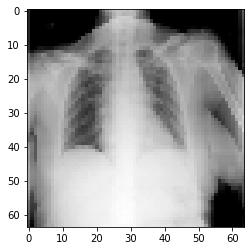

In [18]:
plt.imshow(img,cmap="gray")

### I decided to use 0.80 and 0.95 as parameters. I tried higher numbers but accuracy was getting lower

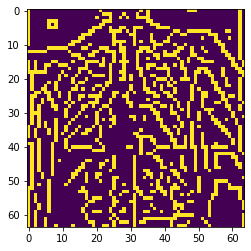

In [19]:
canny = cv2.Canny(img,threshold1=0.80,threshold2=0.95)
plt.imshow(canny)

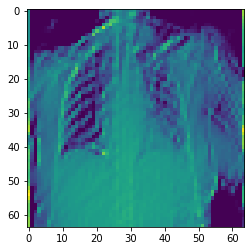

In [20]:
g_kernel = cv2.getGaborKernel((3,3), 5.0, np.pi/8, 2.9, 0.8, 0, ktype=cv2.CV_32F)  ## I used same constants for each exp.
gabor_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
plt.imshow(gabor_img)

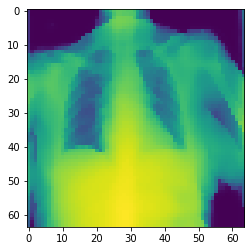

In [21]:
blur = cv2.bilateralFilter(img,5,15,15)  
plt.imshow(blur)

# We have to turn file paths to array of features so we can use them to train our model

In [22]:
img_train = pd.DataFrame(columns=["features","label"])  ## after using filters , detectors etc. I will put them side by side 
img_test = pd.DataFrame(columns=["features","label"])

In [23]:
class_to_id = {"normal":0,"covid":1,"pneumonia":2}
id_to_class = {value : key for key,value in class_to_id.items()}

In [24]:
for i in range(len(train_df)):
    row = train_df.iloc[i]
    img_path = row["file_path"]
    label = row["class"]
    
    img = iio.imread(img_path)
    img = cv2.resize(img, (32,32))
    
    if len(img.shape) >2:
        img = img[:,:,:3] ## some images are readed as 4 dimension, taking 3
    
    canny = cv2.Canny(img,threshold1=0.80,threshold2=0.95)
    canny = np.resize(canny,(32*32))
    canny = canny.astype(float)
   
    
    g_kernel = cv2.getGaborKernel((3,3), 5.0, np.pi/8, 2.9, 0.8, 0, ktype=cv2.CV_32F)
    gabor_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
    gabor_img = np.resize(gabor_img,(32*32))
    gabor_img = gabor_img.astype(float)
    
    blur = cv2.bilateralFilter(img,5,15,15)  
    blur = np.resize(blur,(32*32))
    blur = blur.astype(float)
    
    label = class_to_id[label]

    combined = np.concatenate((canny,gabor_img,blur))
   
    img_train.loc[len(img_train.index)] = [combined,label]

In [25]:
for i in range(len(test_df)):
    row = test_df.iloc[i]
    img_path = row["file_path"]
    label = row["class"]
    
    img = iio.imread(img_path)
    img = cv2.resize(img, (32,32))
    
    if len(img.shape) >2:
        img = img[:,:,:3] ## some images are readed as 4 dimension, taking 3
    
    canny = cv2.Canny(img,threshold1=0.80,threshold2=0.95)
    canny = np.resize(canny,(32*32))
    canny = canny.astype(float)
    
    g_kernel = cv2.getGaborKernel((3,3), 5.0, np.pi/8, 2.9, 0.8, 0, ktype=cv2.CV_32F)
    gabor_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
    gabor_img = np.resize(gabor_img,(32*32))
    gabor_img = gabor_img.astype(float)
    
    blur = cv2.bilateralFilter(img,5,15,15)  
    blur = np.resize(blur,(32*32))
    blur = blur.astype(float)
    
    label = class_to_id[label]
    
    combined = np.concatenate((canny,gabor_img,blur))
    
    img_test.loc[len(img_test.index)] = [combined,label]

In [26]:
img_train.dtypes

features    object
label        int64
dtype: object

In [27]:
print(len(img_train))
print(len(img_test))

3000
300


In [28]:
img_train.sample(5)

,features,label
859,"[0.0, 255.0, 0.0, 255.0, 255.0, 0.0, 0.0, 0.0,...",1
203,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
429,"[255.0, 255.0, 0.0, 255.0, 255.0, 255.0, 0.0, ...",1
2672,"[255.0, 255.0, 0.0, 0.0, 0.0, 0.0, 255.0, 0.0,...",2
263,"[255.0, 255.0, 255.0, 0.0, 0.0, 0.0, 0.0, 255....",1


In [29]:
img_test.sample(5)

,features,label
48,"[0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 255.0, 255.0,...",1
148,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
175,"[0.0, 255.0, 255.0, 0.0, 0.0, 0.0, 0.0, 255.0,...",0
106,"[0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 255.0, 255.0,...",0
150,"[0.0, 255.0, 0.0, 0.0, 255.0, 0.0, 0.0, 0.0, 2...",0


In [30]:
img_train.iloc[0][0].shape

(3072,)

In [31]:
img_test.iloc[0][0].shape

(3072,)

## Training and Testing Our model

In [36]:
knn_model = Knn(3)  
weighted_model = WeightedKnn(3)

In [37]:
X_tr,y_tr = img_train["features"].values,img_train["label"].values
X_test,y_test = img_test["features"].values,img_test["label"].values

In [38]:
knn_model.train(X_tr,y_tr)
weighted_model.train(X_tr,y_tr)

In [39]:
knn_preds = knn_model.predict(X_test)

In [40]:
weighted_preds = weighted_model.predict(X_test)

In [41]:
knn_preds

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [42]:
weighted_preds

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [47]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

### Model Performance Evaluation

In [48]:
print("Knn model Accuracy is ",(100*sum(y_test==knn_preds)/300).round(2))
print("Weighted Knn model Accuracy is ",(100*sum(y_test==weighted_preds)/300).round(5))

Knn model Accuracy is  80.0
Weighted Knn model Accuracy is  80.0


In [45]:
from sklearn.metrics import classification_report,confusion_matrix

print(id_to_class,"\n\n")
print("Metrics For Knn Model")
print(classification_report(y_test,knn_preds))

{0: 'normal', 1: 'covid', 2: 'pneumonia'} 


Metrics For Knn Model
              precision    recall  f1-score   support

           0       0.87      0.52      0.65       100
           1       0.90      0.98      0.94       100
           2       0.69      0.90      0.78       100

    accuracy                           0.80       300
   macro avg       0.82      0.80      0.79       300
weighted avg       0.82      0.80      0.79       300



In [46]:
print(id_to_class,"\n\n")
print("Metrics For Weighted Knn Model")
print(classification_report(y_test,weighted_preds))

{0: 'normal', 1: 'covid', 2: 'pneumonia'} 


Metrics For Weighted Knn Model
              precision    recall  f1-score   support

           0       0.87      0.52      0.65       100
           1       0.91      0.98      0.94       100
           2       0.68      0.90      0.78       100

    accuracy                           0.80       300
   macro avg       0.82      0.80      0.79       300
weighted avg       0.82      0.80      0.79       300



In [23]:
experiments = pd.DataFrame(columns=["model","img_shape","Used_Filters","n_neighbors","Accuracy","Precision_covid","Recall_covid","Precision_normal","Recall_normal","Precision_pneumonia","Recall_pneumonia"])
experiments.loc[0] = ["Knn","32x32","Canny,Gabor",3,77.67,0.84,1.00,0.79,0.49,0.71,0.84]
experiments.loc[1] = ["Weighted Knn","32x32","Canny,Gabor",3,77.67,0.85,1.00,0.79,0.49,0.69,0.84]
experiments.loc[2] = ["Knn","32x32","Canny,Gabor",5,77.67,0.84,1.00,0.79,0.49,0.71,0.84]
experiments.loc[3] = ["Weighted Knn","32x32","Canny,Gabor",5,77.67,0.85,1.00,0.79,0.49,0.69,0.84]
experiments.loc[4] = ["Knn","64x64","Canny,Gabor",3,67.67,0.70,1.00,0.95,0.18,0.62,0.85]
experiments.loc[5] = ["Weighted Knn","64x64","Canny,Gabor",3,67.67,0.71,1.00,1.00,0.17,0.61,0.86]
experiments.loc[6] = ["Knn","32x32","Canny,Gabor,Bilateral",3,80.0,0.90,0.98,0.87,0.52,0.69,0.90]
experiments.loc[7] = ["Weighted Knn","32x32","Canny,Gabor,Bilateral",3,80.0,0.91,0.98,0.87,0.52,0.68,0.90]
experiments.loc[8] = ["Knn","64x64","Canny,Gabor,Bilateral",3,76.67,0.89,0.97,0.97,0.35,0.63,0.98]
experiments.loc[9] = ["Weighted Knn","64x64","Canny,Gabor,Bilateral",3,76,0.89,0.97,0.97,0.33,0.62,0.98]
experiments

,model,img_shape,Used_Filters,n_neighbors,Accuracy,Precision_covid,Recall_covid,Precision_normal,Recall_normal,Precision_pneumonia,Recall_pneumonia
0,Knn,32x32,"Canny,Gabor",3,77.67,0.84,1.00,0.79,0.49,0.71,0.84
1,Weighted Knn,32x32,"Canny,Gabor",3,77.67,0.85,1.00,0.79,0.49,0.69,0.84
2,Knn,32x32,"Canny,Gabor",5,77.67,0.84,1.00,0.79,0.49,0.71,0.84
3,Weighted Knn,32x32,"Canny,Gabor",5,77.67,0.85,1.00,0.79,0.49,0.69,0.84
4,Knn,64x64,"Canny,Gabor",3,67.67,0.70,1.00,0.95,0.18,0.62,0.85
5,Weighted Knn,64x64,"Canny,Gabor",3,67.67,0.71,1.00,1.00,0.17,0.61,0.86
6,Knn,32x32,"Canny,Gabor,Bilateral",3,80.00,0.90,0.98,0.87,0.52,0.69,0.90
7,Weighted Knn,32x32,"Canny,Gabor,Bilateral",3,80.00,0.91,0.98,0.87,0.52,0.68,0.90
8,Knn,64x64,"Canny,Gabor,Bilateral",3,76.67,0.89,0.97,0.97,0.35,0.63,0.98
9,Weighted Knn,64x64,"Canny,Gabor,Bilateral",3,76.00,0.89,0.97,0.97,0.33,0.62,0.98


# Report

### -I Used same parameters for canny detection, gabor filtering and bilateral filtering for each experiment. 

### - Looks Like accuracy is not changing considerably by changing model knn to W-knn but precision for covid cases increases while precision for pneumonia decreases

### - Also it appers that increasing k 3 to 5 doesnt affect results in both model

### -Increasing the img shape 32x32 to 64x64 affected our accuracy in bad way. The reasons for this could be unimportant pixels that is being calculated now.

### -Looks like adding bilateral filtered image to features increases our accuracy and precision for covid cases in both 32x32 and 64x64 images

# -----------------------------------------------------------------------------------------------------------

# Bonus Part Feature extraction resnet 18

In [334]:
import torch
import torchvision

In [335]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [346]:
model = torchvision.models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(512,128,bias=True) ## We can change last layer to have different feature vector shapes;

In [347]:
for param in model.parameters():
    param.requires_grad = False  ## freezing layers we wont train
    
model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [348]:
from  torchvision import transforms

In [349]:
my_transform = transforms.Compose([
     transforms.Resize((64,64)),
     transforms.ToTensor()
])

In [350]:
data = torchvision.datasets.ImageFolder(root=train_path,transform=my_transform)

In [351]:
dataloader = torch.utils.data.DataLoader(data,shuffle=True)

In [352]:
x,y = next(iter(dataloader))
print(x.shape) ##  example image
print(y.shape)  ## example label


torch.Size([1, 3, 64, 64])
torch.Size([1])


In [353]:
x = x.to(device)  

In [354]:
feature_array = model(x)  # giving our image to resnet18

In [355]:
feature_array.shape  ## now we have 1 x 128 shape array of features from an 64x64 image

torch.Size([1, 128])

In [356]:
feature_array

tensor([[ 1.2476e+00, -2.3226e-01, -5.6147e-01, -2.4781e-01,  7.1974e-02,
         -2.4319e-01,  3.7460e-01, -8.3117e-01, -7.3516e-01, -6.6695e-01,
          5.8515e-01, -1.2501e+00,  8.3970e-01, -1.5803e-01, -8.1169e-01,
          3.5399e-01, -4.6258e-01, -1.5016e-01,  2.5513e-01, -8.9513e-01,
          9.4675e-01,  1.0963e-01, -6.8877e-01,  7.8236e-01,  6.7704e-01,
          2.7326e-01, -2.2030e-01, -2.6577e-01, -1.2037e+00,  1.8913e+00,
         -4.2941e-01, -1.1782e-01, -7.5705e-01,  1.3637e+00,  8.0709e-02,
          1.4768e+00,  1.5870e+00, -6.4206e-01,  1.0235e+00, -1.2751e+00,
         -3.5353e-01,  7.4021e-01,  3.9705e-01,  1.1030e-01,  1.2394e+00,
          2.7190e-01, -1.1532e+00, -7.0470e-01,  6.8455e-01,  1.1897e+00,
         -6.5651e-01, -4.7235e-01,  1.1972e+00, -1.6730e-03, -1.0893e-01,
          4.8783e-01,  6.3387e-01, -5.5055e-01,  5.2104e-01, -2.2664e-01,
         -4.1987e-01,  7.8523e-01,  9.3118e-01, -1.7914e-01,  1.0608e+00,
          5.5766e-01,  3.3358e-02, -6.